In [1]:
import pandas as pd

data = pd.read_csv('data/dataframes/dataframe_final.csv', index_col=0)
label = pd.read_csv('data/dataframes/label_final.csv', index_col=0)

In [2]:
# mode=2인 데이터  mode = 1 로 대체

data['mode'] = data['mode'].replace(2, 1)
len(data[data['mode']==1])+len(data[data['mode']==0])

313187

In [48]:
import pandas as pd

# 데이터 로드
data2022 = pd.read_csv('modeltest/2022.csv', index_col=0)
data2022 = data2022.drop('date', axis=1)
label2022 = pd.read_csv('modeltest/2022_label.csv', index_col=0)

# 데이터 전처리
data2022['mode'] = data2022['mode'].replace(2, 1)

# 데이터와 라벨 결합
combined = pd.concat([data2022, label2022], axis=1)

# 복원추출 수행 (원본 데이터셋의 7배 크기)
resampled_combined = combined.sample(n=len(combined) * 6, replace=True, random_state=42)

# 데이터와 라벨 분리
data2022 = resampled_combined.iloc[:, :-label2022.shape[1]]
label2022 = resampled_combined.iloc[:, -label2022.shape[1]:]

print(data2022.shape)
print(label2022.shape)



(31800, 10)
(31800, 1)


In [49]:
data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
data2023 = data2023.drop('date', axis=1)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)
data2023['mode'] = data2023['mode'].replace(2, 1)

In [33]:
# 60년 데이터 선형회귀
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

std = StandardScaler()
data_std = std.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data_std, label, test_size=0.3, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.0037742203499413485

In [50]:
# 2022데이터 선형회귀
std = StandardScaler()
data2022_std = std.fit_transform(data2022)

X_train, X_test, y_train, y_test = train_test_split(data2022_std, label2022, test_size=0.3, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.032001737009159426

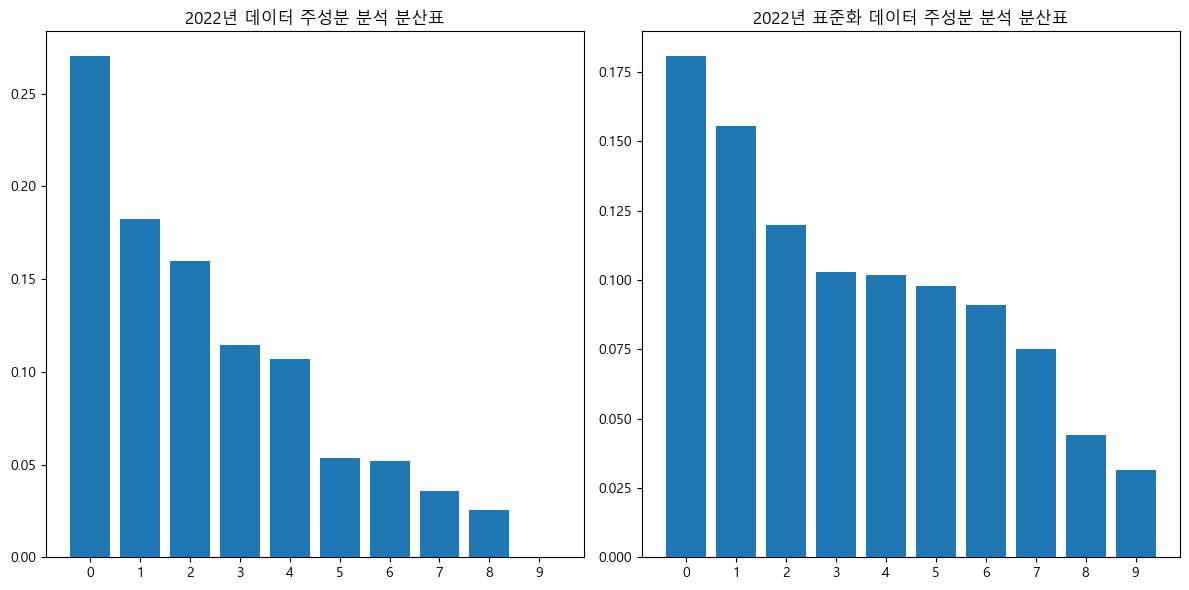

In [51]:
# 60년 데이터 주요 성분 분산 비교표
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 표준화
std = StandardScaler()
data_std = std.fit_transform(data)
data2022_std = std.fit_transform(data2022)

# PCA 적용
pca = PCA()

datasets = {
    '2022년 데이터 주성분 분석 분산표': data2022,
    '2022년 표준화 데이터 주성분 분석 분산표': data2022_std
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, (title, dataset) in zip(axes.flatten(), datasets.items()):
    pca.fit(dataset)
    explained_variance_ratio = pca.explained_variance_ratio_
    x = np.arange(len(explained_variance_ratio))
    ax.bar(x, explained_variance_ratio)
    ax.set_xticks(x)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [52]:
X_train = data2022
X_test = data2023
y_train = label2022
y_test = label2023

학습 세트 정확도 :  0.688
검증 세트 정확도 :  -0.332


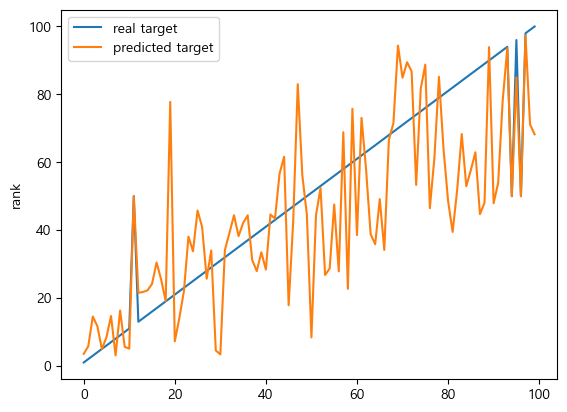

In [53]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

학습 세트 정확도 :  0.687
검증 세트 정확도 :  -0.331


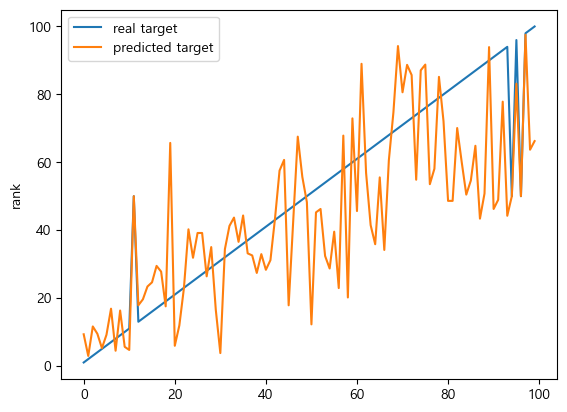

In [54]:
from sklearn.neighbors import KNeighborsRegressor

std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_std, y_train)

y_predicted = model.predict(X_test_std)

train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [57]:
# 원본데이터 PCA
from sklearn.neighbors import KNeighborsRegressor

pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_pca, y_train)

y_predicted = model.predict(X_test_pca)

train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

학습 세트 정확도 :  0.687
검증 세트 정확도 :  -0.309


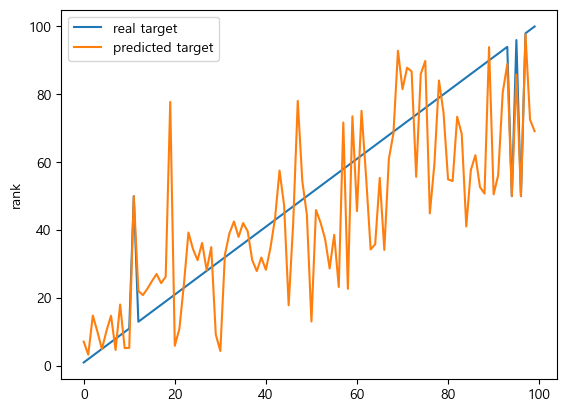

In [58]:
number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

학습 세트 정확도 :  0.686
검증 세트 정확도 :  -0.466


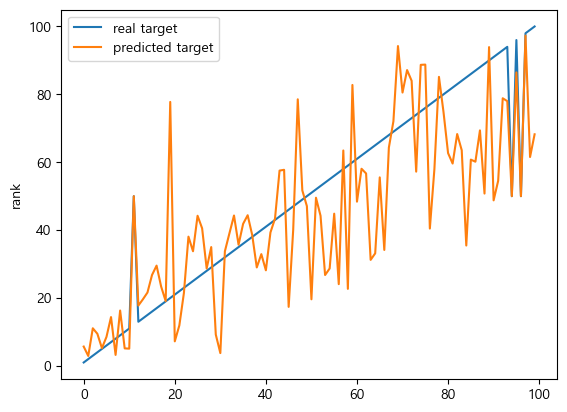

In [59]:
# 표준화 데이터
from sklearn.neighbors import KNeighborsRegressor

pca = PCA(n_components=7)
std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_pca, y_train)

y_predicted = model.predict(X_test_pca)

train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [31]:
# 표준화 pca 하이퍼파라미터 그리드 설정

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_pca, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", grid_search.best_params_)
print("최적의 검증 점수: ", grid_search.best_score_)

최적의 하이퍼파라미터:  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
최적의 검증 점수:  0.6983330206934315


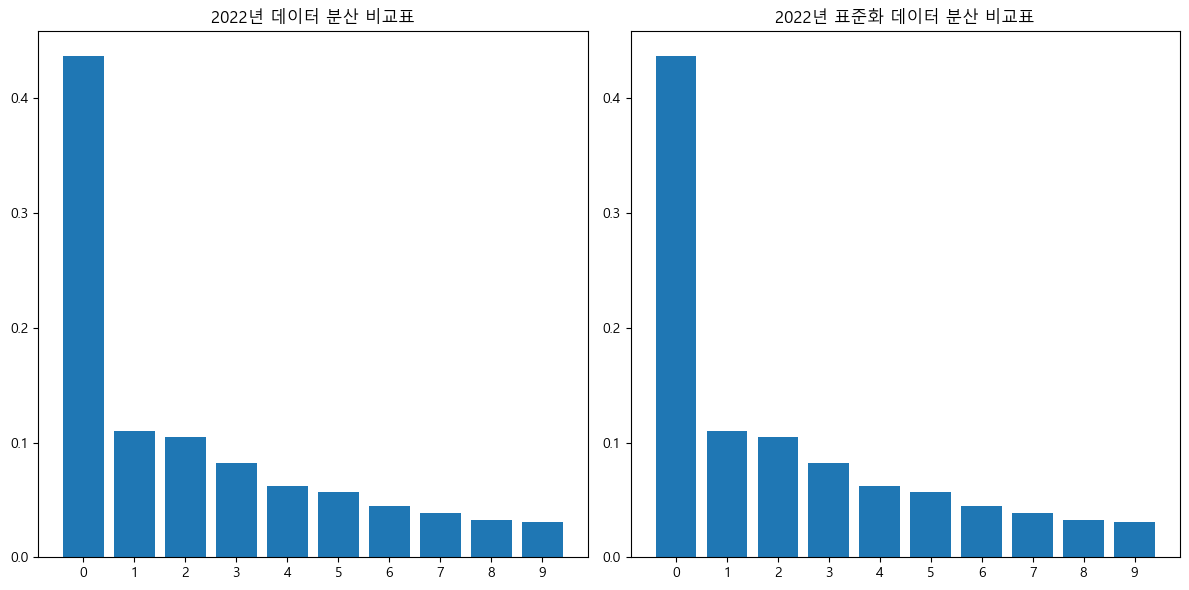

In [60]:
# lda 주요 성분 분산표
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 데이터 표준화
std = StandardScaler()
data_std = std.fit_transform(data)
data2022_std = std.fit_transform(data2022)

# LDA 적용
lda = LinearDiscriminantAnalysis()

datasets = {
    '2022년 데이터 분산 비교표': (data2022, label2022),
    '2022년 표준화 데이터 분산 비교표': (data2022_std, label2022)
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, (title, (dataset, labels)) in zip(axes.flatten(), datasets.items()):
    lda.fit(dataset, labels.values.reshape(-1))  # labels를 numpy 배열로 변환 후 reshape
    explained_variance_ratio = lda.explained_variance_ratio_
    x = np.arange(len(explained_variance_ratio))
    ax.bar(x, explained_variance_ratio)
    ax.set_xticks(x)
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# LDA 적용
lda = LDA(n_components=7)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# KNN 모델 적용
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))


c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 세트 정확도 :  0.689
검증 세트 정확도 :  -0.23


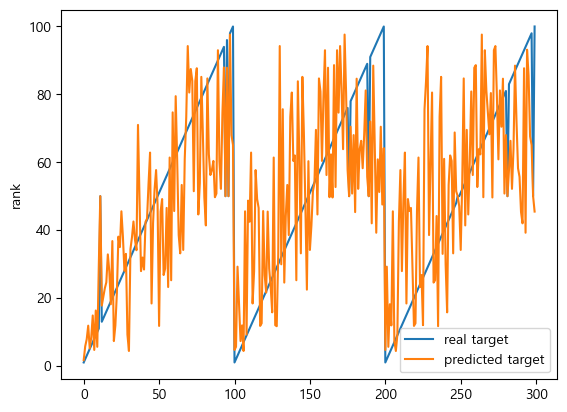

In [65]:
number_of_sample = 300

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [63]:
# 표준화 LDA 적용
lda = LDA(n_components=7)

std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# KNN 모델 적용
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 세트 정확도 :  0.69
검증 세트 정확도 :  -0.237


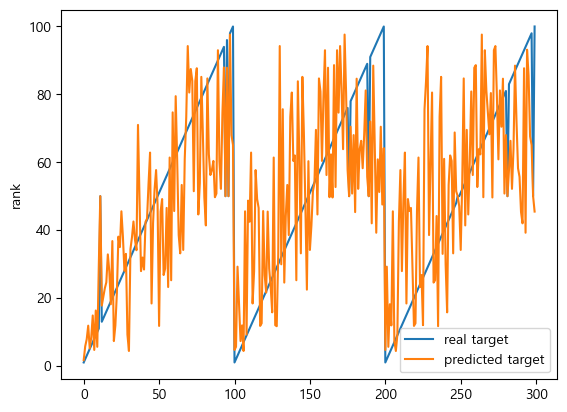

In [66]:
number_of_sample = 300

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

lda = LDA(n_components=7)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

model = KNeighborsRegressor()
# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='r2')
grid_search.fit(X_train_lda, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", grid_search.best_params_)
print("최적의 검증 점수: ", grid_search.best_score_)

c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


최적의 하이퍼파라미터:  {'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
최적의 검증 점수:  0.6963587554224909


In [78]:
def getBestKNN(X_train, X_test):
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors':[ 55,56,57,58],
        'weights': ['distance'],
        'metric': ['minkowski'],
        'algorithm': ['auto'],
        'leaf_size': [50],
        'p': [2]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print('Best parameters : ', grid_search.best_params_)
    print('Best score : ', grid_search.best_score_)
    print('Best estimator test score : ', grid_search.best_estimator_.score(X_test, y_test))

    return grid_search.best_estimator_

In [71]:
getBestKNN(X_train_lda, X_test_lda)

Best parameters :  {'leaf_size': 50, 'metric': 'minkowski', 'n_neighbors': 28, 'p': 2, 'weights': 'distance'}
Best score :  0.6992512833409354
Best estimator test score :  -0.20950878220868008


KNeighborsRegressor(leaf_size=50, n_neighbors=28, weights='distance')

In [73]:
getBestKNN(X_train_lda, X_test_lda)

Best parameters :  {'leaf_size': 50, 'metric': 'minkowski', 'n_neighbors': 36, 'p': 2, 'weights': 'distance'}
Best score :  0.7002817044040089
Best estimator test score :  -0.2014662322286842


KNeighborsRegressor(leaf_size=50, n_neighbors=36, weights='distance')

In [75]:
getBestKNN(X_train_lda, X_test_lda)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 50, 'metric': 'minkowski', 'n_neighbors': 44, 'p': 2, 'weights': 'distance'}
Best score :  0.7011879828105579
Best estimator test score :  -0.20130829772614378


KNeighborsRegressor(leaf_size=50, n_neighbors=44, weights='distance')

In [77]:
getBestKNN(X_train_lda, X_test_lda)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 50, 'metric': 'minkowski', 'n_neighbors': 56, 'p': 2, 'weights': 'distance'}
Best score :  0.7022450080792503
Best estimator test score :  -0.18951562735755423


KNeighborsRegressor(leaf_size=50, n_neighbors=56, weights='distance')

In [79]:
getBestKNN(X_train_lda, X_test_lda)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 50, 'metric': 'minkowski', 'n_neighbors': 56, 'p': 2, 'weights': 'distance'}
Best score :  0.7022450080792503
Best estimator test score :  -0.18951562735755423


KNeighborsRegressor(leaf_size=50, n_neighbors=56, weights='distance')

In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA 적용
lda = LDA(n_components=7)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_neighbors': [56],
    'weights': ['distance'],
    'metric': ['minkowski'],
    'algorithm': ['auto'],
    'leaf_size': [50],
    'p': [2]
}

# KNN 모델 생성
knn = KNeighborsRegressor()

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2')

# 모델 훈련
grid_search.fit(X_train_lda, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test_lda)

# 학습 세트와 검증 세트 점수 출력
train_score = best_model.score(X_train_lda, y_train)
test_score = best_model.score(X_test_lda, y_test)

# 교차 검증 점수 계산
cross_val_scores = cross_val_score(best_model, X_train_lda, y_train, cv=5, scoring='r2')

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))
print('교차 검증 점수 : ', cross_val_scores)
print('교차 검증 평균 점수 : ', round(cross_val_scores.mean(), 3))

c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 세트 정확도 :  0.718
검증 세트 정확도 :  -0.19
교차 검증 점수 :  [0.70572665 0.70072836 0.70333635 0.70084409 0.70542609]
교차 검증 평균 점수 :  0.703


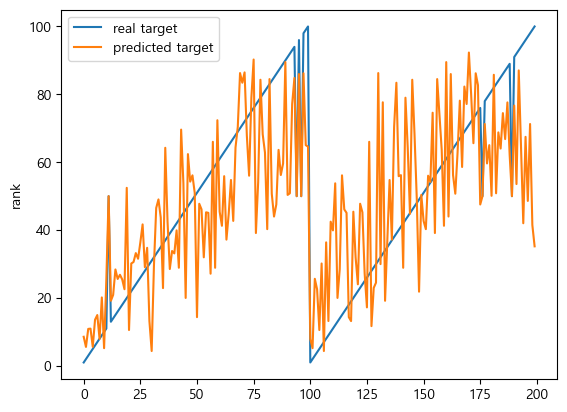

In [94]:
number_of_sample = 200

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

학습 세트 정확도 :  0.029
검증 세트 정확도 :  -0.01


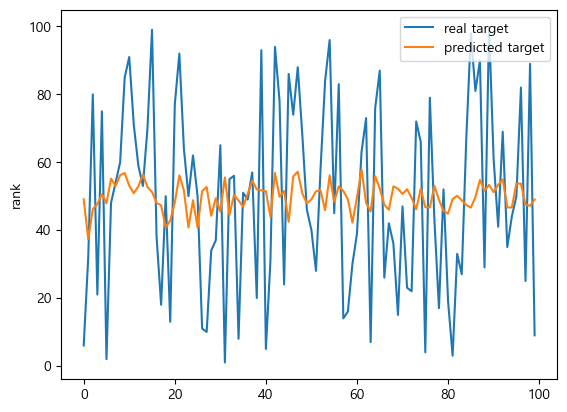

In [121]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso 회귀 모델 적용
model = Lasso(alpha=0.1)  # alpha 값은 필요에 따라 조정할 수 있습니다
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

학습 세트 정확도 :  0.03
검증 세트 정확도 :  -0.012


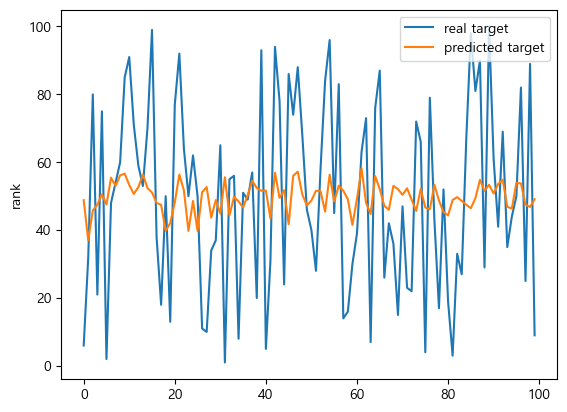

In [122]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge 회귀 모델 적용
model = Ridge(alpha=0.1)  # alpha 값은 필요에 따라 조정할 수 있습니다
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()


Ridge 모델 학습 세트 정확도: 0.03
Ridge 모델 검증 세트 정확도: 0.029
Lasso 모델 학습 세트 정확도: 0.03
Lasso 모델 검증 세트 정확도: 0.029
ElasticNet 모델 학습 세트 정확도: 0.03
ElasticNet 모델 검증 세트 정확도: 0.029


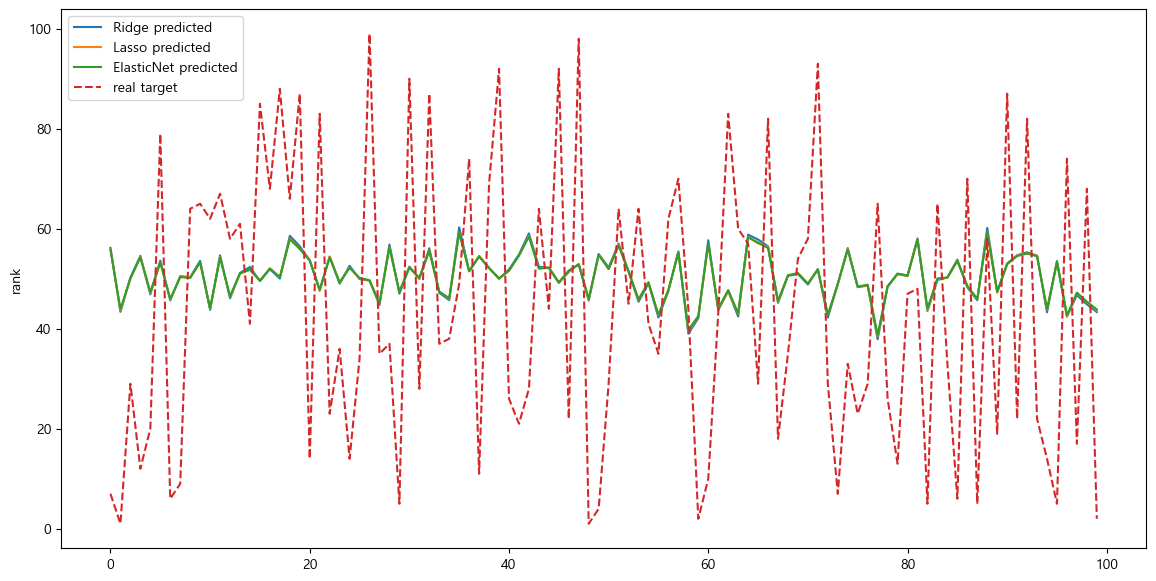

In [130]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 리스트
models = {
    'Ridge': Ridge(alpha=0.1),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio는 L1과 L2 비율을 조정합니다
}

# 결과 저장용 딕셔너리
results = {}

# 모델 학습 및 예측
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_predicted = model.predict(X_test_scaled)
    
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    
    results[name] = {
        'train_score': train_score,
        'test_score': test_score,
        'y_predicted': y_predicted
    }
    
    print(f'{name} 모델 학습 세트 정확도: {round(train_score, 3)}')
    print(f'{name} 모델 검증 세트 정확도: {round(test_score, 3)}')

# 예측 결과 시각화
number_of_sample = 100
plt.figure(figsize=(14, 7))

for name, result in results.items():
    plt.plot(range(number_of_sample), result['y_predicted'][:number_of_sample], label=f'{name} predicted')

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target', linestyle='--')
plt.ylabel('rank')
plt.legend()
plt.show()


In [ ]:
#이이이이잉

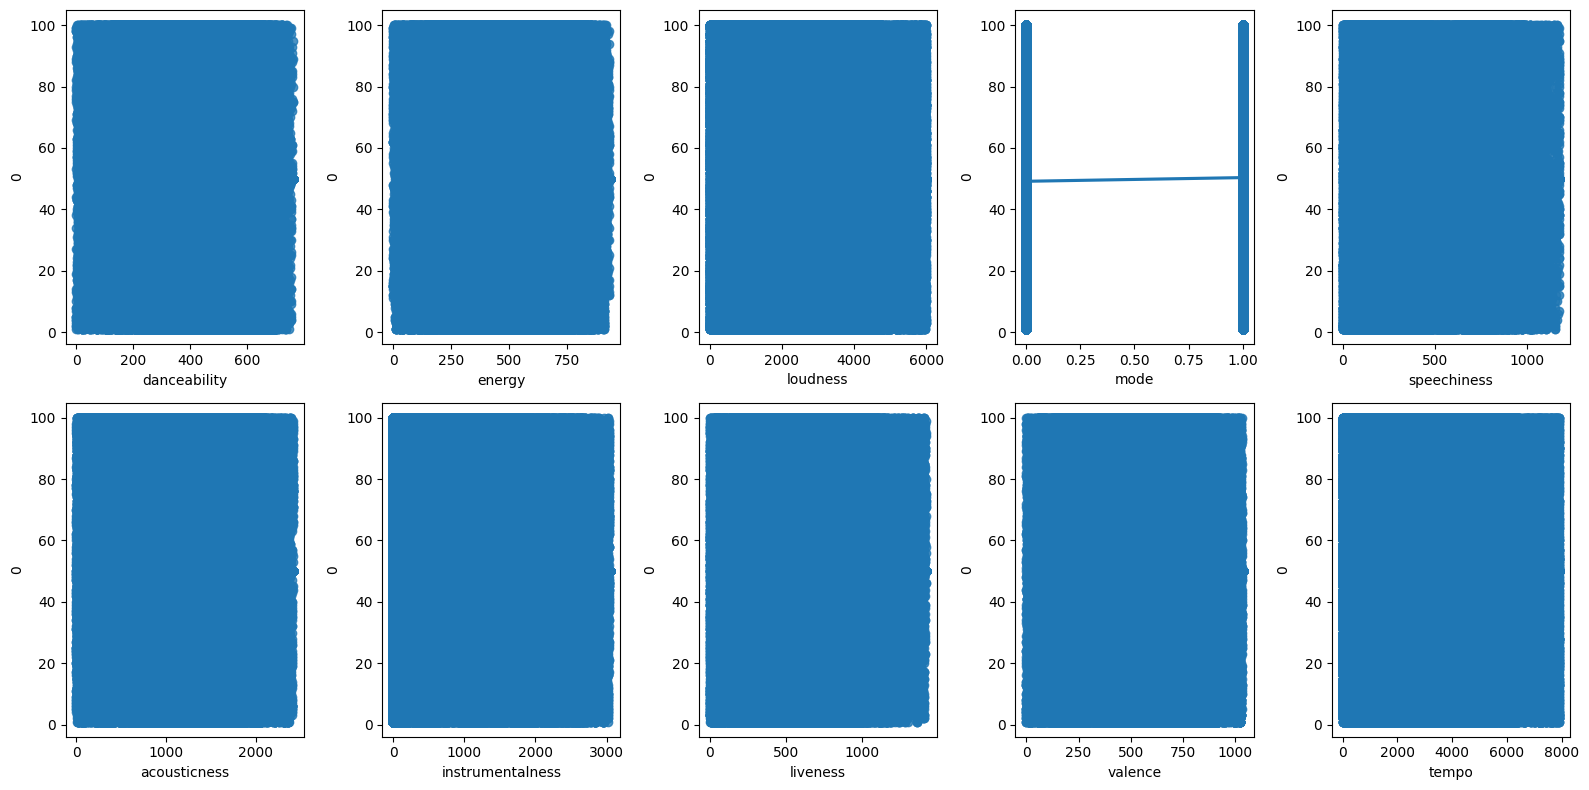

In [53]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # 데이터 병합
# df = pd.concat([data, label], axis=1)

# # 서브플롯 생성
# fig, axs = plt.subplots(figsize=(16, 8), ncols=5, nrows=2)
# features = data.columns

# # 각 feature에 대해 회귀선 그리기
# for i, feature in enumerate(features):
#     row = i // 5
#     col = i % 5
#     sns.regplot(x=feature, y=label.columns[0], data=df, ax=axs[row][col])

# plt.tight_layout()
# plt.show()
# # 각 feature과 label간의 상관관계가 없음.